In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# M = 100
M = 587

a = pd.read_csv(f"/Users/helenology/Desktop/[M={M}]rmse_data.csv")
a.head()

,Unnamed: 0,seed,n,alpha,M,init_beta,init_sigma,os_beta,os_sigma,ts_beta,ts_sigma,oracle_beta
0,0,0,5000,1,587,0.007064,2.722624,0.003724,2.104895,0.003060,2.147726,0.003205
1,1,1,5000,1,587,0.005395,2.230601,0.003530,1.827827,0.002514,1.840891,0.002625
2,2,2,5000,1,587,0.006691,2.185707,0.004523,1.784120,0.003526,1.806088,0.003412
3,3,3,5000,1,587,0.005942,2.749274,0.003227,2.007967,0.003068,1.976633,0.002949
4,4,4,5000,1,587,0.006956,2.294054,0.004214,1.778667,0.003950,1.764476,0.004176


In [48]:
a.columns

Index(['Unnamed: 0', 'seed', 'n', 'alpha', 'M', 'init_beta', 'init_sigma',
       'os_beta', 'os_sigma', 'ts_beta', 'ts_sigma', 'oracle_beta'],
      dtype='object')

In [49]:
print(a.shape)

(29, 12)


In [50]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

In [51]:
print(f"initial: {np.mean(a.init_beta):6f}")
print(f"OS: {np.mean(a.os_beta):6f}")
print(f"TS: {np.mean(a.ts_beta):6f}")
print(f"Oracle: {np.mean(a.oracle_beta):6f}")

initial: 0.006747
OS: 0.004044
TS: 0.003781
Oracle: 0.003785


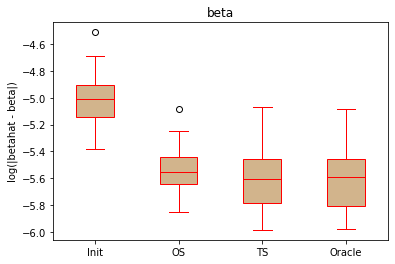

In [52]:
data1 = np.log(np.array(a.init_beta))
data2 = np.log(np.array(a.os_beta))
data3 = np.log(np.array(a.ts_beta))
data4 = np.log(np.array(a.oracle_beta))
beta_data = [data1, data2, data3, data4]

fig, ax = plt.subplots()
bp1 = box_plot(beta_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0]], ['Raw'])
# ax.set_ylim(0, 10)
plt.ylabel("log(|betahat - beta|)")
plt.title("beta")
plt.xticks(range(1, len(example_data1)+1), labels=["Init", "OS", "TS", "Oracle"], rotation=0)
plt.show()

In [53]:
data1 = np.log(np.array(a.init_sigma))
data2 = np.log(np.array(a.os_sigma))
data3 = np.log(np.array(a.ts_sigma))

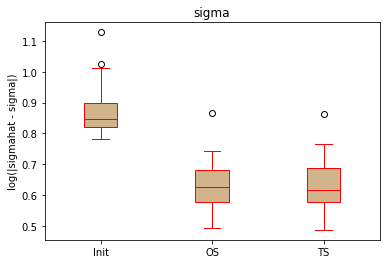

In [54]:
sigma_data = [data1, data2, data3]

fig, ax = plt.subplots()
bp1 = box_plot(sigma_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Raw', 'Rescale'])
# ax.set_ylim(0, 10)
plt.ylabel("log(|sigmahat - sigma|)")
plt.title("sigma")
plt.xticks(range(1, len(sigma_data)+1), labels=["Init", "OS", "TS"], rotation=0)
plt.show()